### 히스토그램 그리기

In [1]:
# 범위 파악 : xlim
height = read.csv('csv/height.csv')
height <- height$height
mx <- max(height)
mn <- min(height)
range <- mx - mn

sprintf('%d %d %d', mx, mn, range)

[1] "169 143 26"

### 구간(breaks) 설정

In [2]:
# 구간 최소값
bmin = as.integer(mn/10) * 10      # 구간 최소값
bmax = as.integer(mx/10) * 10 + 10 # 구간 최대값

sprintf('%d %d', bmax, bmin)

[1] "170 140"

In [3]:
# 계급값 설정 - 구간을 나누는 기준값
bins = seq(140, 170, 5)
bins

mid = (bins[2] - bins[1]) / 2
mdbins = bins + mid
mdbins

[1] 140 145 150 155 160 165 170

[1] 142.5 147.5 152.5 157.5 162.5 167.5 172.5

[1]  1  6 19 30 18  6

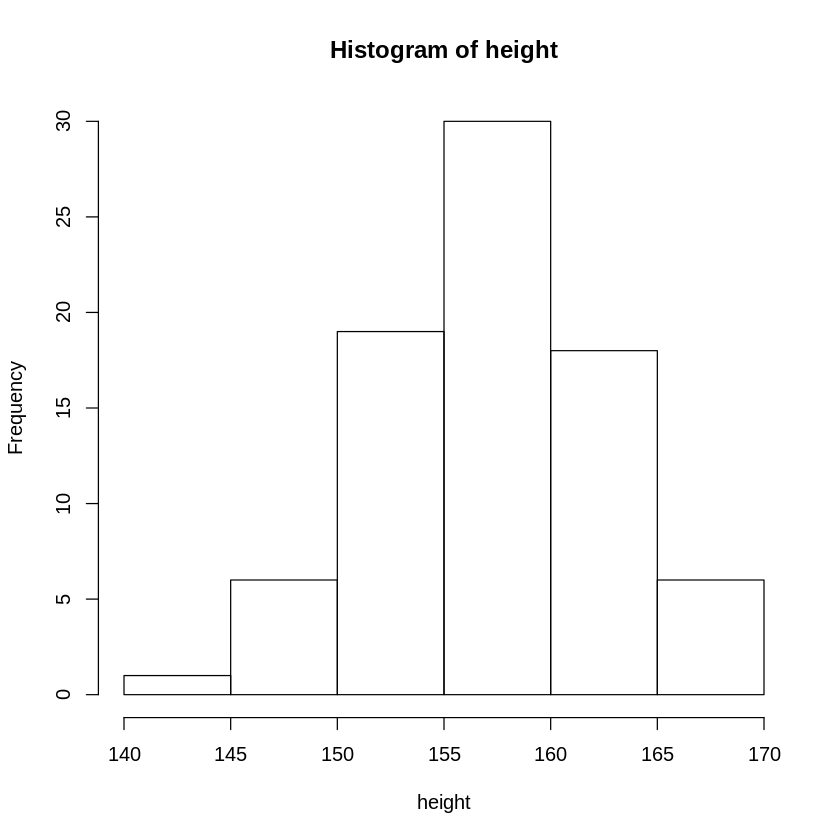

In [4]:
# 구간내 빈도계산
h <- hist(height, breaks=bins)
h$counts

In [5]:
# 상대도수 : 구간별빈도/전체빈도수
total = length(height)  #  전체빈도수 = 전체수 = 80
relfrq = h$counts / total
relfrq

sum(relfrq)

[1] 0.0125 0.0750 0.2375 0.3750 0.2250 0.0750

[1] 1

In [6]:
# 누적도수 : 각 구간별 빈도 누적합
# 누적합 cumsum(객체)

csfrq = cumsum(h$counts)
csfrq

[1]  1  7 26 56 74 80

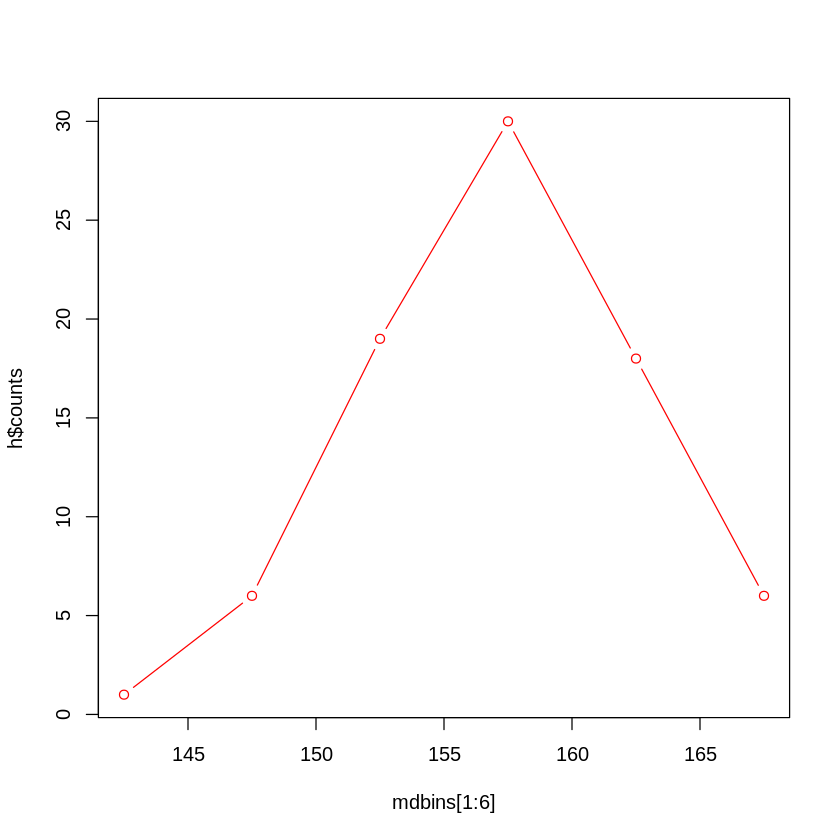

In [7]:
# 계긊값 시각화
plot(mdbins[1:6], h$counts, type='b', col='red')

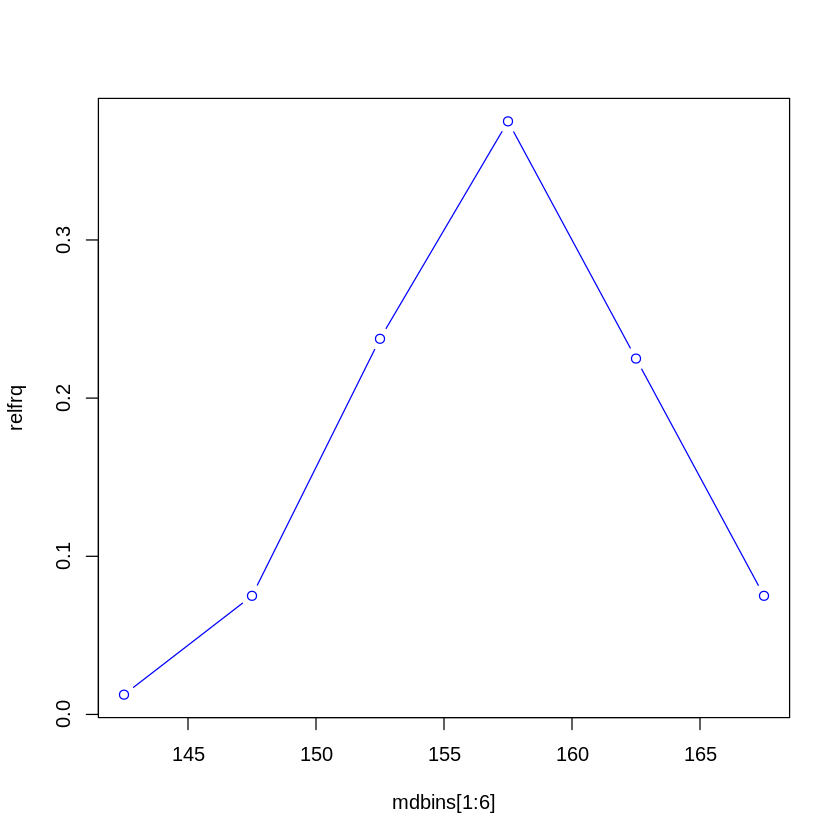

In [8]:
# 상대도수 시각화
plot(mdbins[1:6], relfrq, type='b', col='blue')

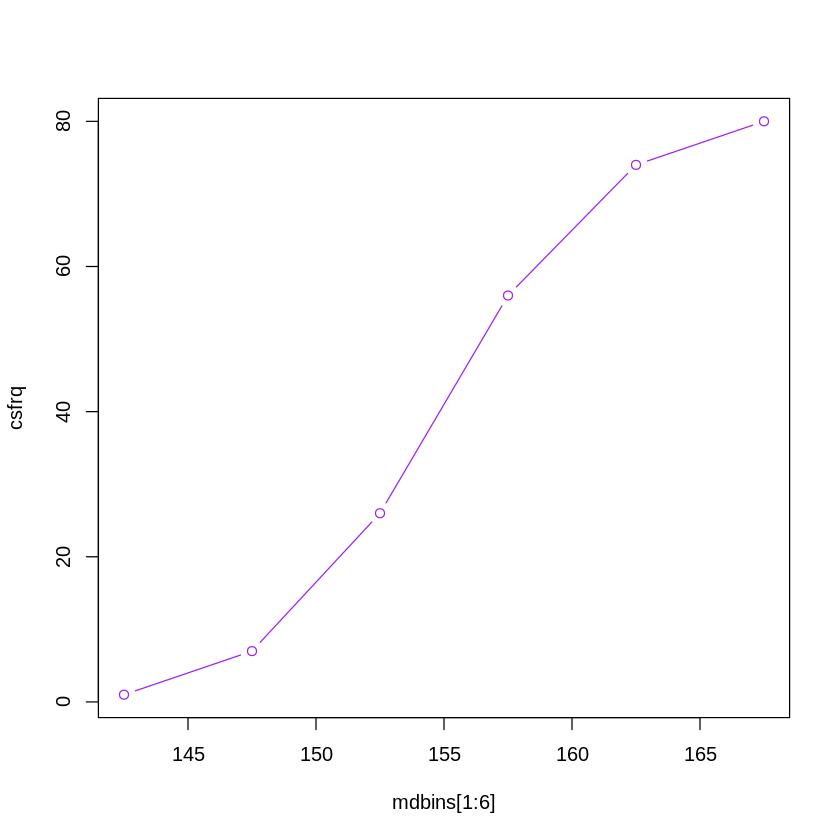

In [9]:
# 누적도수 시각화
plot(mdbins[1:6], csfrq, type='b', col='purple')

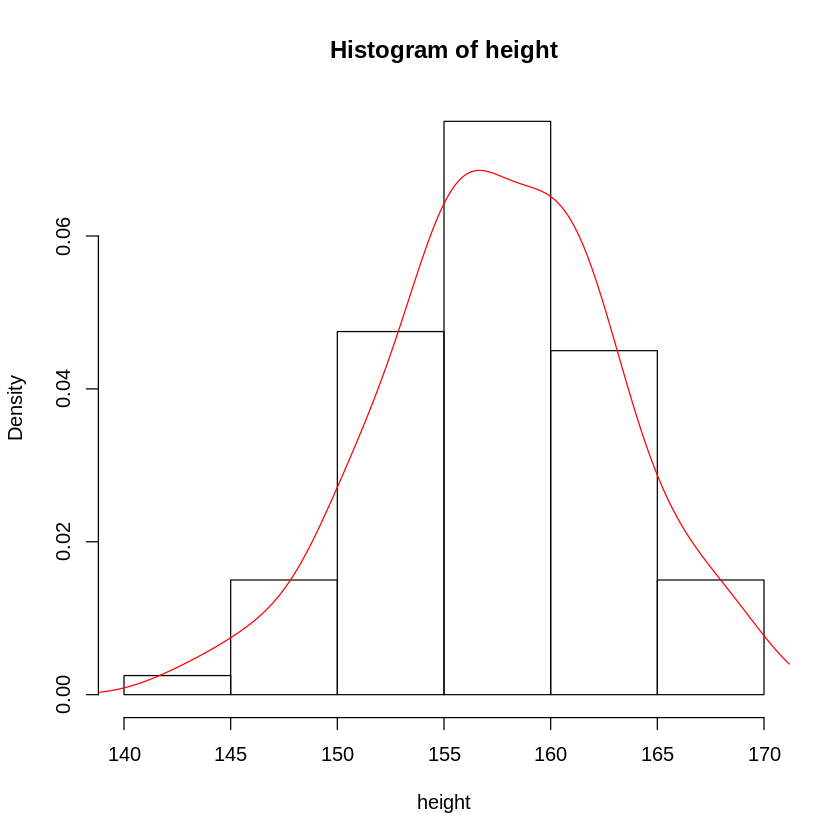

In [10]:
# 확률밀도추정 KDE 그래프 시각화
# kernal density estimation
# 관측된 데이터들의 분포로부터 원래 변수의 확률분포특성을 추정
# 즉, 해당 변수에서 관측된 몇 가지 데이터로부터 변수가 가질수 있는 모든 값들에 대한 밀도(확률)을 추정하는 것을 의미
#  ex)  수능을 위해 모의고사를 실시하는 경우
#     - 모의고사를 통해 실제 수능시험의 성적 예측 가능
#     - 즉, 몇 회의 모의고사 성적에 대한 분포를 토대로 실제 수능시험을 통해 받을 성적에 대한 확률을 유추할 수 있음

hist(height, freq=F)
lines(density(height), col='red')

In [11]:
# 타이타닉 탑슥객의 나이 분포 시각화
titanic = read.csv('csv/titanic.csv')

# 적절한 자료형으로 변환
titanic$pclass <- as.factor(titanic$pclass)
titanic$survived <- as.factor(titanic$survived)
titanic$name <- as.factor(titanic$name)
titanic$ticket <- as.factor(titanic$ticket)

head(titanic)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S
6,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S


In [12]:
str(titanic)

'data.frame':	1310 obs. of  11 variables:
 $ pclass  : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ survived: Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 1 2 1 ...
 $ name    : Factor w/ 1308 levels "","Abbing, Mr. Anthony",..: 23 25 26 27 28 32 47 48 52 56 ...
 $ sex     : Factor w/ 3 levels "","female","male": 2 3 2 3 2 3 2 3 2 3 ...
 $ age     : num  29 0.917 2 30 25 ...
 $ sibsp   : int  0 1 1 1 1 0 1 0 2 0 ...
 $ parch   : int  0 2 2 2 2 0 0 0 0 0 ...
 $ ticket  : Factor w/ 930 levels "","110152","110413",..: 189 51 51 51 51 126 94 17 78 827 ...
 $ fare    : num  211 152 152 152 152 ...
 $ cabin   : Factor w/ 187 levels "","A10","A11",..: 45 81 81 81 81 151 147 17 63 1 ...
 $ embarked: Factor w/ 4 levels "","C","Q","S": 4 4 4 4 4 4 4 4 4 2 ...


In [13]:
summary(titanic)

  pclass    survived                              name          sex     
 1   :323   0   :809   Connolly, Miss. Kate         :   2         :  1  
 2   :277   1   :500   Kelly, Mr. James             :   2   female:466  
 3   :709   NA's:  1                                :   1   male  :843  
 NA's:  1              Abbing, Mr. Anthony          :   1               
                       Abbott, Master. Eugene Joseph:   1               
                       Abbott, Mr. Rossmore Edward  :   1               
                       (Other)                      :1302               
      age              sibsp            parch            ticket    
 Min.   : 0.1667   Min.   :0.0000   Min.   :0.000   CA. 2343:  11  
 1st Qu.:21.0000   1st Qu.:0.0000   1st Qu.:0.000   1601    :   8  
 Median :28.0000   Median :0.0000   Median :0.000   CA 2144 :   8  
 Mean   :29.8811   Mean   :0.4989   Mean   :0.385   3101295 :   7  
 3rd Qu.:39.0000   3rd Qu.:1.0000   3rd Qu.:0.000   347077  :   7  
 Max.   

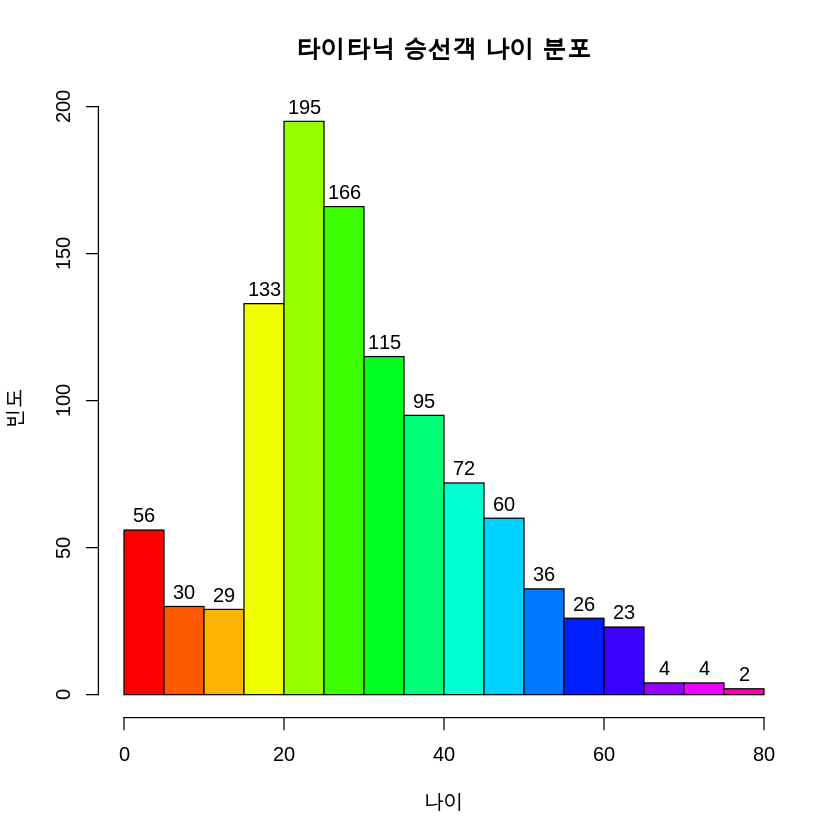

In [14]:
# 히스토그램 구간 수 계산
cnts = length(seq(0,80, 5))   # 17 구간

h <- hist(titanic$age, main='타이타닉 승선객 나이 분포', xlab='나이', ylab='빈도', col=rainbow(17))
text(h$mids, h$counts+5, lab=h$counts)

In [15]:
# 결측치 제거
age2 <- na.omit(titanic$age)

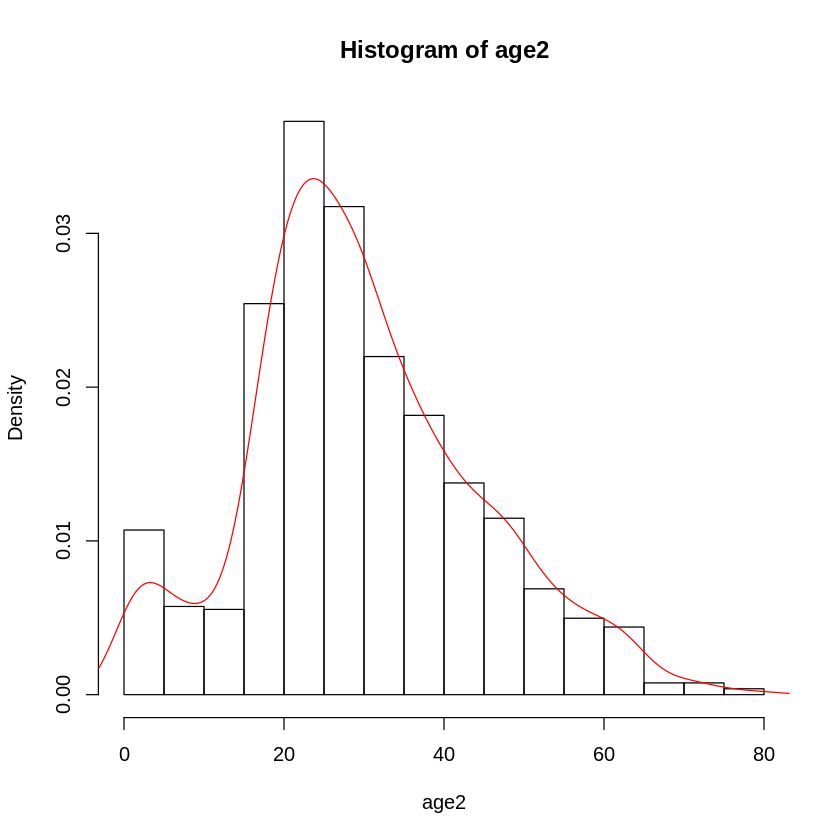

In [16]:
hist(age2, probability=T)
lines(density(age2), col='red')

### tips 데이터셋
+ seaborn 내장 데이터셋
+ 손님들의 성별, 흡연여부, 요일별, 시간별, 손님수별 식사비용과 팁에 관련된 데이터

In [17]:
tips <- read.csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

# 식사규모 size를 범주형으로 변환
tips$size <- as.factor(tips$size)

str(tips)
head(tips)

'data.frame':	244 obs. of  7 variables:
 $ total_bill: num  17 10.3 21 23.7 24.6 ...
 $ tip       : num  1.01 1.66 3.5 3.31 3.61 4.71 2 3.12 1.96 3.23 ...
 $ sex       : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 2 2 2 2 2 ...
 $ smoker    : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ day       : Factor w/ 4 levels "Fri","Sat","Sun",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ time      : Factor w/ 2 levels "Dinner","Lunch": 1 1 1 1 1 1 1 1 1 1 ...
 $ size      : Factor w/ 6 levels "1","2","3","4",..: 2 3 3 2 4 4 2 4 2 2 ...


,total_bill,tip,sex,smoker,day,time,size
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
6,25.29,4.71,Male,No,Sun,Dinner,4


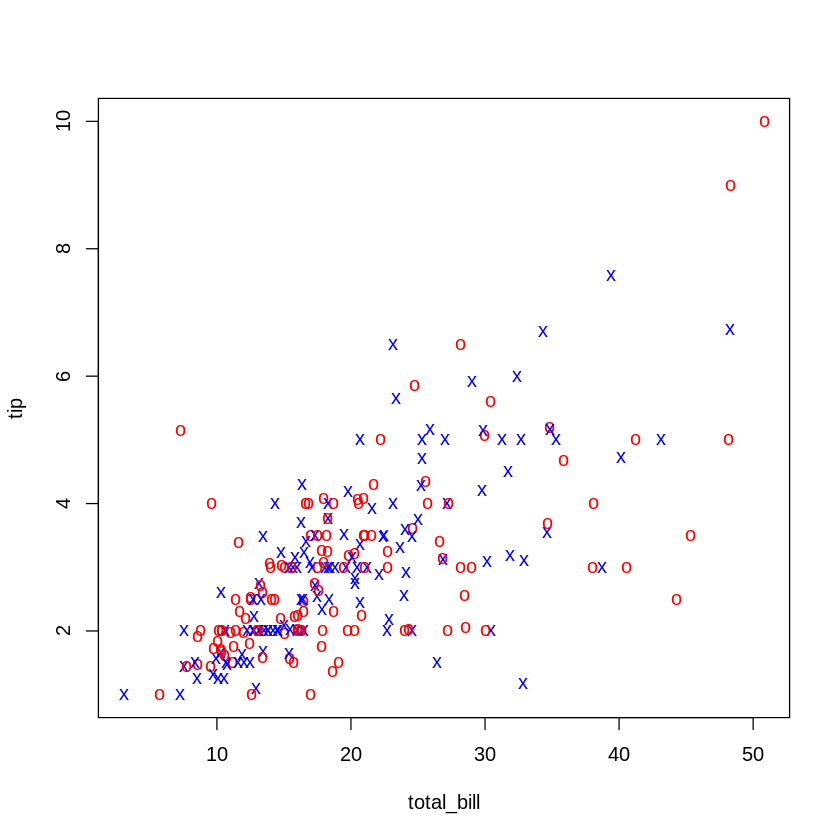

In [18]:
# 지불금액 대비 틱과의 관계 : 산점도
plot(tips$total_bill, tips$tip, xlab=c('total_bill'), ylab=c('tip'), pch=c('o','x'), col=c('red','blue'))

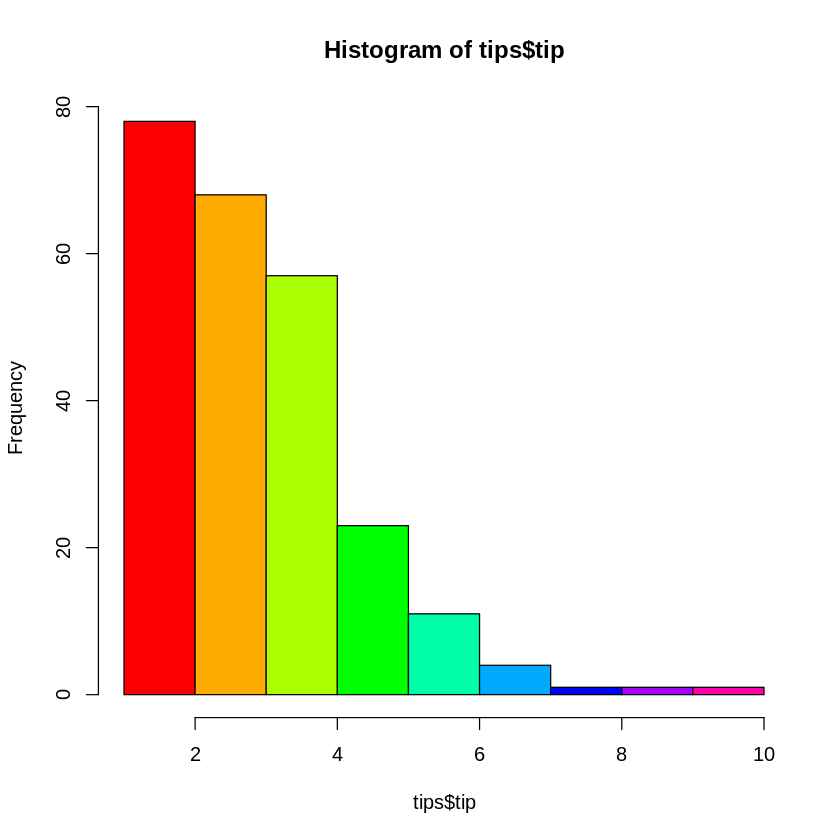

In [19]:
# tip별 빈도 : 히스토그램
hist(tips$tip, col=rainbow(9))

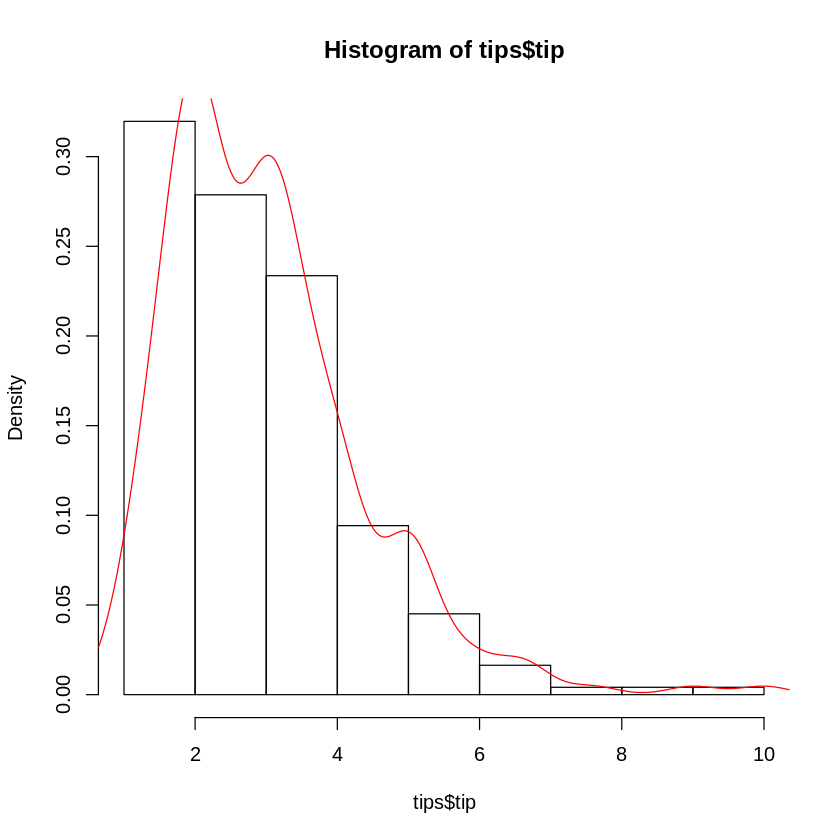

In [20]:
# 팁별 빈도 : KDE
hist(tips$tip, probability=T)
lines(density(tips$tip), col='red')

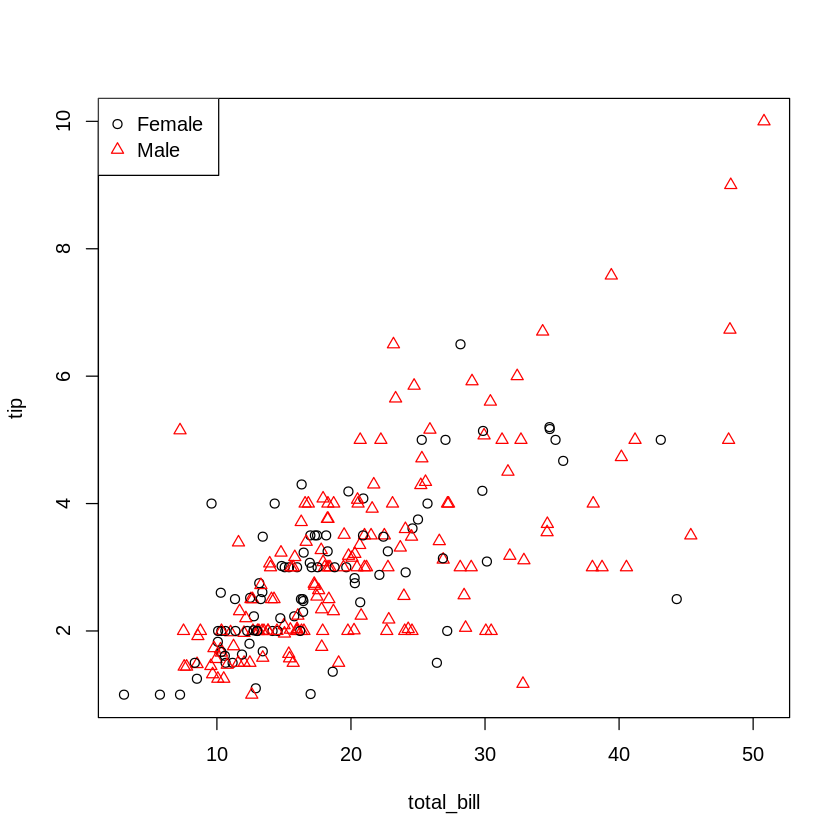

In [21]:
# 지불금액 대비 팁과의 관계 + 성별 여부 : 산점도
gender <- as.integer(tips$sex)
plot(tips$total_bill, tips$tip, xlab=c('total_bill'), ylab=c('tip'), pch=gender, col=gender)
legend('topleft', levels(tips$sex), pch=unique(gender), col=unique(gender))

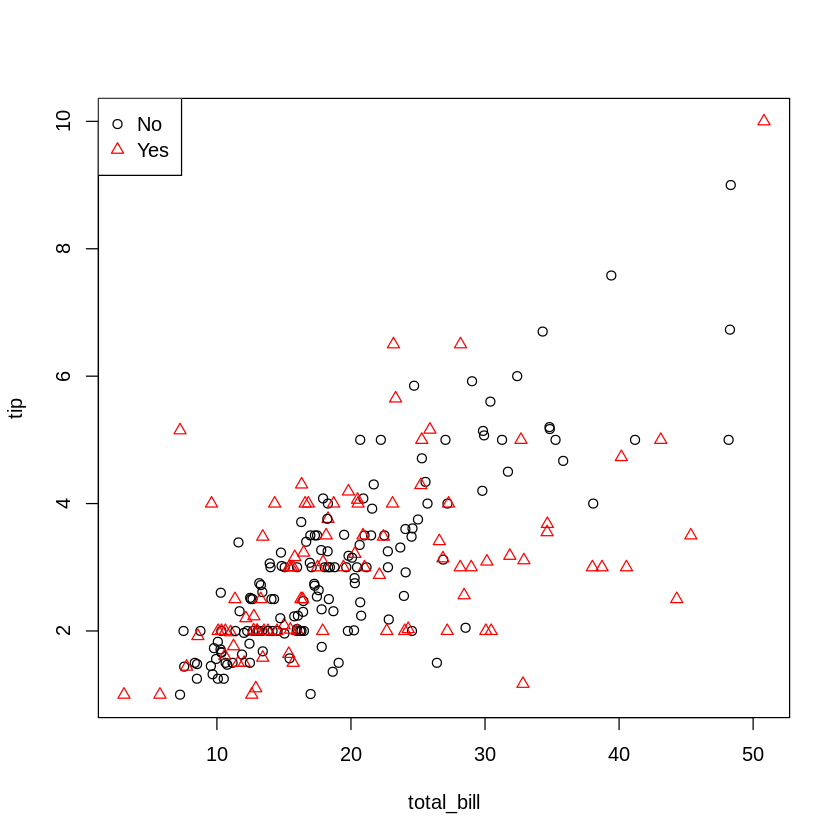

In [22]:
# 지불금액 대비 팁과의 관계 + 흡연 여부 : 산점도
smoker <- as.integer(tips$smoker)
plot(tips$total_bill, tips$tip, xlab=c('total_bill'), ylab=c('tip'), pch=smoker, col=smoker)
legend('topleft', levels(tips$smoker), pch=unique(smoker), col=unique(smoker))

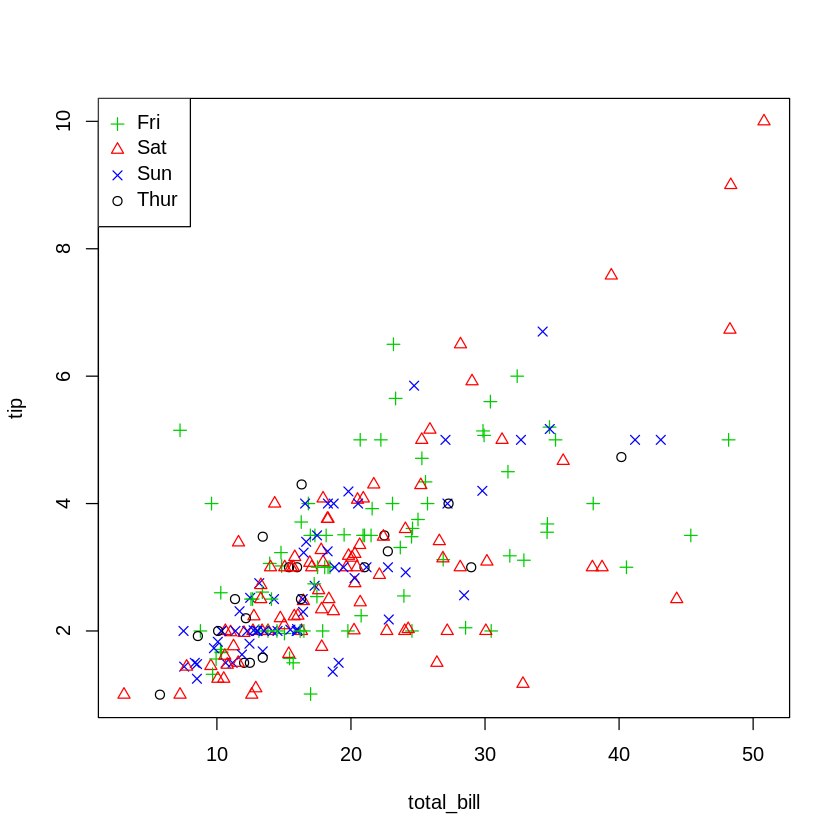

In [23]:
# 지불금액 대비 팁과의 관계 + 요일 : 산점도
day <- as.integer(tips$day)
plot(tips$total_bill, tips$tip, xlab=c('total_bill'), ylab=c('tip'), pch=day, col=day)
legend('topleft', levels(tips$day), pch=unique(day), col=unique(day))

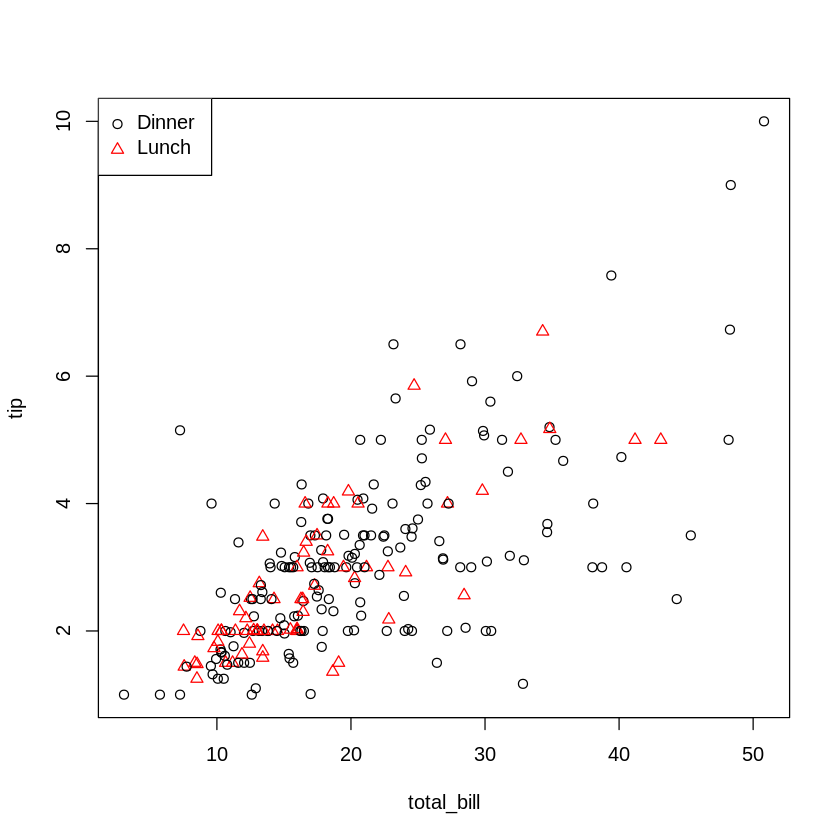

In [24]:
# 지불금액 대비 팁과의 관계 + 시간 : 산점도
time <- as.integer(tips$time)
plot(tips$total_bill, tips$tip, xlab=c('total_bill'), ylab=c('tip'), pch=time, col=time)
legend('topleft', levels(tips$time), pch=unique(time), col=unique(time))

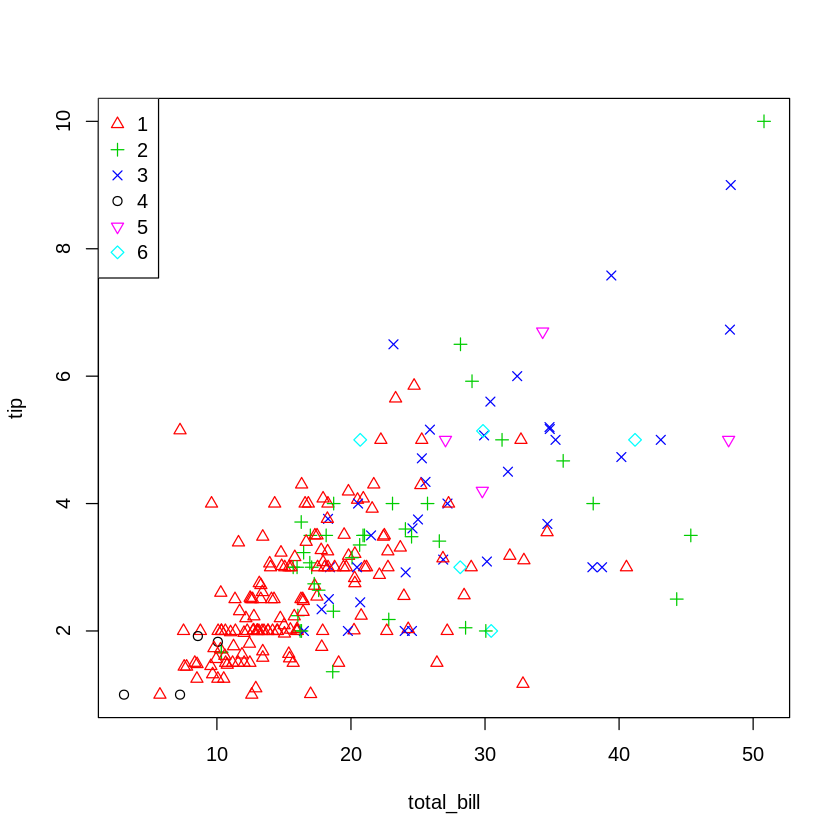

In [25]:
# 지불금액 대비 팁과의 관계 + 규모 : 산점도
size <- as.integer(tips$size)
plot(tips$total_bill, tips$tip, xlab=c('total_bill'), ylab=c('tip'), pch=size, col=size)
legend('topleft', levels(tips$size), pch=unique(size), col=unique(size))

###  작업한 데이터 저장하기
+ R에서 만든 객체(벡터, 데이터프레임)들은 메모리내에 생성
+ 따라서, 프로그램(주피터)이 종료하면 메모리내 객체들은 사라짐
+ 메모리내 에 생성된 객체를 파일형태로 저장해둬야 함 - 직렬화
+ 파일 저장 : save(객체명, 파일경로)
+ 파일 읽기 : load(파일경로)

In [26]:
save(height, file='rdata/height.rdata')

In [27]:
# 객체 리스트 확인
ls()

[1] "age2"    "bins"    "bmax"    "bmin"    "cnts"    "csfrq"   "day"    
 [8] "gender"  "h"       "height"  "mdbins"  "mid"     "mn"      "mx"     
[15] "range"   "relfrq"  "size"    "smoker"  "time"    "tips"    "titanic"
[22] "total"

In [28]:
# 객체 삭제
rm(height)

In [29]:
load('rdata/height.rdata')